### Here we are going to implment word2vec with simple examples using tensorflow.

###  Collect data

here will use only 10 sentences to create word vectors.

In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

### Remove stop words

In order to efficency of creating word vector, we will commonly used words.

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

In [3]:
corpus = remove_stop_words(corpus=corpus)

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
words = set(words)

Here we have word set by which we will have word vector.

In [5]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [6]:
len(words)

12

### Data generation
we will generate label for each word using skp gram.


In [8]:
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

print(sentences)


    
    
    

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


In [18]:
data = []

for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence) +1) ]:
            if neighbor != word:
                data.append([word, neighbor])
print(data)
    

[['king', 'strong'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['wise', 'queen'], ['wise', 'woman'], ['woman', 'queen'], ['woman', 'wise'], ['boy', 'young'], ['young', 'boy'], ['young', 'man'], ['man', 'boy'], ['man', 'young'], ['girl', 'young'], ['young', 'girl'], ['young', 'woman'], ['woman', 'girl'], ['woman', 'young'], ['prince', 'young'], ['young', 'prince'], ['young', 'king'], ['king', 'prince'], ['king', 'young'], ['princess', 'young'], ['young', 'princess'], ['young', 'queen'], ['queen', 'princess'], ['queen', 'young'], ['man', 'strong'], ['strong', 'man'], ['woman', 'pretty'], ['pretty', 'woman'], ['prince', 'boy'], ['boy', 'prince'], ['boy', 'king'], ['king', 'prince'], ['king', 'boy'], ['princess', 'girl'], ['girl', 'princess'], ['girl', 'queen'], ['queen', 'princess'], ['queen', 'girl']]


In [19]:
import pandas as pd

In [20]:
for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [21]:
df = pd.DataFrame(data, columns=['input', 'label'])
df.head(10)

,input,label
0,king,strong
1,strong,king
2,strong,man
3,man,king
4,man,strong
5,queen,wise
6,wise,queen
7,wise,woman
8,woman,queen
9,woman,wise


In [22]:
df.shape

(44, 2)

In [23]:
word2int

{'boy': 11,
 'girl': 8,
 'king': 5,
 'man': 7,
 'pretty': 9,
 'prince': 6,
 'princess': 2,
 'queen': 10,
 'strong': 1,
 'wise': 4,
 'woman': 0,
 'young': 3}

## Define Tensorflow Graph

In [24]:
import tensorflow as tf
import numpy as np

In [28]:
ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index): 
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] #input word
Y = [] #target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))
    
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# make placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which will represents word vector eventualy
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
    

### Train

In [29]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    sess.run(train_op, feed_dict={x:X_train, y_label:Y_train})
    
    if(i % 3000) == 0:
        print('iteration ' + str(i) + ' loss is ', sess.run(loss, feed_dict={x:X_train, y_label:Y_train}))

iteration 0 loss is  3.2340484
iteration 3000 loss is  1.8304778
iteration 6000 loss is  1.6530712
iteration 9000 loss is  1.5741837
iteration 12000 loss is  1.5601434
iteration 15000 loss is  1.5526162
iteration 18000 loss is  1.5473117


In [30]:
# Now the hidden layer (W1 + b1) is actually the word look up table.
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.7387542  -1.0633042 ]
 [ 3.6148353   2.203877  ]
 [-2.7587402  -2.7523696 ]
 [ 0.17869002  0.02634662]
 [ 1.9506283  -1.983141  ]
 [-3.697774    3.7575731 ]
 [-2.8938098   1.7499149 ]
 [-1.4937537   1.4115863 ]
 [-1.6559155  -3.0008068 ]
 [ 2.9848635  -0.7384721 ]
 [-3.1224551  -4.8323736 ]
 [-1.1052227   1.3904579 ]]


### Word vector in table

In [31]:
w2v_df = pd.DataFrame(vectors, columns=['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,woman,-0.738754,-1.063304
1,strong,3.614835,2.203877
2,princess,-2.758740,-2.752370
3,young,0.178690,0.026347
4,wise,1.950628,-1.983141
5,king,-3.697774,3.757573
6,prince,-2.893810,1.749915
7,man,-1.493754,1.411586
8,girl,-1.655915,-3.000807
9,pretty,2.984864,-0.738472


### word vector in 2d chart

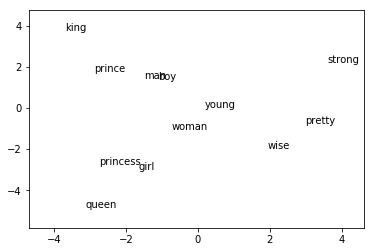

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
    
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)
    
plt.show()